# K-means Clustering Algorithm

You will implement the K-means unsupervised learning algorithm.

Use the simplified Iris dataset provided to test your code.

Column 1: sepal length.
Column 2: sepal width

50 samples for setosa, 50 samples for versicolor

   


(100, 2)


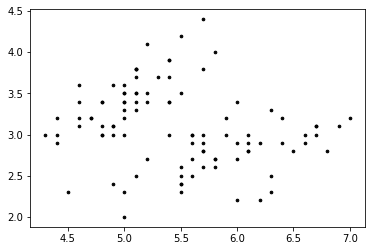

In [1]:
# Load dataset and plot it

%matplotlib inline
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt

df = pd.read_csv('simple_iris_dataset.csv')

df1 = df['sepal_length'].values
df2 = df['sepal_width'].values
X = np.array(list(zip(df1, df2)))   # 100 x 2
plt.scatter(df1, df2, c='black', s=7)
print(X.shape)

In [2]:
# Plot results
def plot_clusters(X, clusters, centroids):
    """
      X : unlabeled data set X of size Nx2
      clusters: Nx1 vector of the cluster assignment of each instance in X.
        [0, 1, 1, ...]
      centroids: 2x2 matrix, the rows are the coordinates of the centroids 
        [[centroid 1 - 1x2 vector]
         [centroid 2 - 1x2 vector]] 
    """
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    k,_ = np.shape(centroids)

    fig, ax = plt.subplots()
    for i in range(k):
        print(colors[i])
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

    plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=150, c='y')

Algorithm converges after 7 iterations
r
g


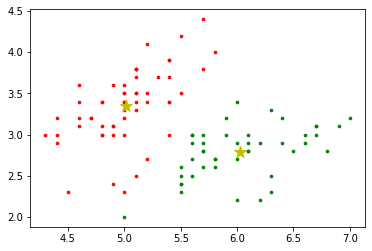

In [3]:
def find_clusters(X):
  '''
    Input: data set X of size 100x2
    Outputs:
      X: unlabeled data set, size Nx2.
      clusters: N-dimensional vector of the cluster assignment of 
        each instance in X.
        [0, 1, 1, ...]
      centroids: 2x2 matrix, the row contains the coordinates of the centroids
        [[centroid 1 - 1x2 vector]
         [centroid 2 - 1x2 vector]] 
  '''
  # Initialize - take 2 random samples from data set
  k=2
  N = len(X)
  ctr1 = X[(np.random.randint(0,N)),:]
  ctr2 = X[(np.random.randint(0,N)),:]

  # Initialize the centroids
  centroids = np.array(list(zip(ctr1, ctr2)), dtype=np.float32)  # 2x2

  # Cluster indices
  clusters = np.zeros(len(X))

  MAX_ITR = 100
  # Loop till convergence, i.e., centroids do not change anymore
  # or until raching MAX_ITR

  for itr in range(0,MAX_ITR):
    
    # TO DO: Create cluster assignment
    # Compute the distance of each instance to both centroids then 
    # assign the cluster index (0 or 1)
    # Hint: you may use np.linalg.norm, set axis=1 to get the dimensions right

    for i in range(len(X)):
        ## >> Your code goes here ...
        dist1 = np.linalg.norm(np.subtract(X[i].reshape(1,2),centroids[0].reshape(1,2)),axis=1)
        dist2 = np.linalg.norm(np.subtract(X[i].reshape(1,2),centroids[1].reshape(1,2)),axis=1)

        if(dist1 < dist2):
          clusters[i] = 0
        else:
          clusters[i] = 1
        
    # TO DO: Store old centroid values
    # Hint: use 'deepcopy' since assignment statements in Python do not copy objects 
    # (they create bindings between a target and an object)
    # Example: C_old = deepcopy(C)
    
    ## >> Your code goes here ...
    C_old = deepcopy(centroids)
       
    # TO DO: Update the centroids
    # Take the average of all the cluster members to update the centroids
    ## >> Your code goes here ...
    clus0_Size = 0
    clus0_Tot = 0
    clus1_Size = 0
    clus1_Tot = 0

    #find size of cluster index and total size of each cluster
    for i in range(len(clusters)):
      if(clusters[i] == 0):
        clus0_Size = clus0_Size+1
        clus0_Tot = clus0_Tot+X[i]
      else:
        clus1_Size = clus1_Size+1
        clus1_Tot = clus1_Tot+X[i]
    
    #finds average of culster0 for ctr1
    if(clus0_Size == 0):
      ctr1 = 0
    else:
      ctr1 = clus0_Tot/clus0_Size

    #finds average of cluster1 for ctr2
    if(clus1_Size == 0):
      ctr2 = 0
    else:
      ctr2 = clus1_Tot/clus1_Size

    #set new centroid
    centroids = np.array((ctr1, ctr2), dtype=np.float32)
    


    # TO DO: Algorithm converges if distance between new and old centroids is 0
    # Hint: use np.linalg.norm

    ## >> Your code goes here ...
    if(np.linalg.norm(np.subtract(C_old,centroids)) == 0):
      break

  print('Algorithm converges after {} iterations'. format(itr))
  return clusters, centroids


clusters, centroids = find_clusters(X)
plot_clusters(X, clusters, centroids)